<a href="https://colab.research.google.com/github/Weeraton/Data_Assignments_ImagePart/blob/master/DataSet_Concat_Best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Nectec         = /content/drive/MyDrive/Colab Notebooks/HTR Impove Test/dataset_thai_M.rar
# Syn              = /content/drive/MyDrive/Colab Notebooks/HTR Impove Test/Syn.rar
# Scan            = /content/drive/MyDrive/Colab Notebooks/HTR Impove Test/output.rar
# Digital Input = /content/drive/MyDrive/Colab Notebooks/HTR Impove Test/DATA/input ver4-2.zip

In [3]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras

# import matplotlib.pyplot as plt

import matplotlib as mpl 

import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=20)
plt = mpl.pyplot

In [5]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 

In [6]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label2 = label.split(" ")
        first = 0
        label3 = []
        for i in label2:
          if first == 0 :
            first = 1
            continue
          else :
            label3.append(i+" ")
        label3 = listToString(label3)
        cleaned_labels.append(label3)
    return cleaned_labels


#Data1 Nectec

In [7]:
!cp '/content/drive/MyDrive/Colab Notebooks/HTR Impove Test/dataset_thai_M.rar' '/content'
!unrar x -Y dataset_thai_M.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from dataset_thai_M.rar

Extracting  dataset_thai/Label_list.label                                  0%  OK 
Extracting  dataset_thai/r32/r32-0001.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0002.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0003.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0004.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0005.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0006.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0007.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0008.png                                  0%  OK 
Extracting  dataset_thai/r32/r32-0009.png                          

In [8]:
base_path = "dataset_thai"
words_list = []

words = open(f"dataset_thai/Label_list.label", "r" ,encoding='cp874')
for line in words:

    words_list.append(line)
len(words_list)

np.random.shuffle(words_list)

In [9]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 581
Total validation samples: 32
Total test samples: 33


In [10]:
base_image_path = os.path.join(base_path)


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        img_path = os.path.join(
            base_image_path, partI, image_name 
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

Process

In [11]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label2 = label.split(" ")
    first = 0
    label3 = []
    for i in label2:
      if first == 0 :
        first = 1
        continue
      else :
        label3.append(i+" ")
    label3 = listToString(label3)
    for char in label3:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label3)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[10:]

Maximum length:  31
Vocab size:  56


['ร้อยเอ็ด ',
 'ลพบุรี ',
 'ลพบุรี ',
 'ชัยภูมิ ',
 'ชุมพร ',
 'ราชบุรี ',
 'ร้อยเอ็ด ',
 'กระบี่ ',
 'ชัยภูมิ ',
 'อ่างทอง ',
 'สุโขทัย ',
 'บุรีรัมย์ ',
 'ราชบุรี ',
 'บุรีรัมย์ ',
 'อุดรธานี ',
 'เพชรบุรี ',
 'ยโสธร ',
 'พะเยา ',
 'สุรินทร์ ',
 'กรุงเทพฯ ',
 'นครพนม ',
 'บุรีรัมย์ ',
 'ระนอง ',
 'สระบุรี ',
 'ยะลา ',
 'นครพนม ',
 'เชียงราย ',
 'สุรินทร์ ',
 'นครพนม ',
 'สุโขทัย ',
 'ตราด ',
 'ระนอง ',
 'เชียงราย ',
 'ชัยภูมิ ',
 'พัทลุง ',
 'อ่างทอง ',
 'สุรินทร์ ',
 'พะเยา ',
 'เพชรบุรี ',
 'อุดรธานี ',
 'โรคร้อน ',
 'เชียงราย ',
 'กระบี่ ',
 'ราชบุรี ',
 'กรุงเทพฯ ',
 'ราชบุรี ',
 'ลพบุรี ',
 'ร้อยเอ็ด ',
 'บุรีรัมย์ ',
 'เชียงราย ',
 'ชัยภูมิ ',
 'พัทลุง ',
 'ราชบุรี ',
 'น่าน ',
 'กระบี่ ',
 'เพชรบุรี ',
 'ร้อยเอ็ด ',
 'เพชรบุรี ',
 'นครพนม ',
 'ยะลา ',
 'ชัยภูมิ ',
 'ราชบุรี ',
 'บุรีรัมย์ ',
 'ปรับปรุงแก้ไข ',
 'กล้องวงจรปิด ',
 'บุรีรัมย์ ',
 'สุโขทัย ',
 'กระบี่ ',
 'อ่างทอง ',
 'พัทลุง ',
 'พัทลุง ',
 'กระบี่ ',
 'น่าน ',
 'ตราด ',
 'ระนอง ',
 'กระบี่ ',
 'เชียงราย ',
 'เม็

In [12]:

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [13]:
Totol_train_labels_cleaned =  []
Totol_validation_labels_cleaned = []
Totol_test_labels_cleaned = []
Totol_train_img_paths = []
Totol_train_labels = []
Totol_validation_img_paths =[] 
Totol_validation_labels = []
Totol_test_img_paths = [] 
Totol_test_labels = []

In [14]:
# Totol_train_labels_cleaned =  Totol_train_labels_cleaned+train_labels_cleaned
# Totol_validation_labels_cleaned = Totol_validation_labels_cleaned + validation_labels_cleaned
# Totol_test_labels_cleaned = Totol_test_labels_cleaned + test_labels_cleaned
# Totol_train_img_paths = Totol_train_img_paths + train_img_paths
# Totol_train_labels = Totol_train_labels + train_labels
# Totol_validation_img_paths =Totol_validation_img_paths + validation_img_paths
# Totol_validation_labels = Totol_validation_labels + validation_labels
# Totol_test_img_paths = Totol_test_img_paths + test_img_paths
# Totol_test_labels = Totol_test_labels + test_labels

#Data2 Syn             

In [15]:
!cp '/content/drive/MyDrive/Colab Notebooks/HTR Impove Test/Syn.rar' '/content'
!unrar x -Y Syn.rar

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Extracting  Pic/โคกSOV_Thanamas.ttf.png                                   92%  OK 
Extracting  Pic/โคกSOV_wayo..png                                          92%  OK 
Extracting  Pic/โคกSOV_wayo.png                                           92%  OK 
Extracting  Pic/โคกSOV_wayo.ttf.png                                       92%  OK 
Extracting  Pic/โคกSP-Ruammit B..png                                      92%  OK 
Extracting  Pic/โคกSP-Ruammit B.png                                       92%  OK 
Extracting  Pic/โคกSP-Ruammit B.ttf.png                                   92%  OK 
Extracting  Pic/โคกTH Kodchasal Italic..png                               92%  OK 
Extracting  Pic/โคกTH Kodchasal Italic.png                                92%  OK 
Extracting  Pic/โคกTH Kodchasal Italic.ttf.png                            92%  OK 
Extracting  Pic/โคกTH K

In [16]:
base_path = "Pic"
words_list = []

words = open(f"/content/Label.txt", "r" ,encoding='utf-8')
for line in words:

    words_list.append(line)
len(words_list)

np.random.shuffle(words_list)

In [17]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 22465
Total validation samples: 1248
Total test samples: 1249


In [18]:
base_image_path = os.path.join(base_path)


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        if len(line_split) > 2:
          continue
        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        # partI = image_name.split("-")[0]
        img_path = os.path.join(
            base_image_path, image_name 
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [19]:
train_labels_cleaned = []

for label in train_labels:
    label2 = label.split(" ")
    first = 0
    label3 = []
    for i in label2:
      if first == 0 :
        first = 1
        continue
      else :
        label3.append(i+" ")
    label3 = listToString(label3)
    for char in label3:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label3)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[10:]

Maximum length:  55
Vocab size:  67


['อุรณะ ',
 'กระถินหอม ',
 'กมล ',
 'พล่อย ',
 'บรรยง ',
 'ละเมอ ',
 'สะลึมสะลือ ',
 'สขะ ',
 'นาศ ',
 'เจิ่น ',
 'สิกข์ ',
 'โรทะ ',
 'เสือดาว ',
 'ตังเม ',
 'ตะครั่นตะครอ ',
 'วิฆเนศ ',
 'กำจัด ',
 'อาลักษณ์ ',
 'แหย่ ',
 'สิญจน์ ',
 'สรฏะ ',
 'กระติ๊ด ',
 'ยูษะ ',
 'นางล้อม ',
 'อาลักษณ์ ',
 'ลิกษา ',
 'ละลาบละล้วง ',
 'เทียนกิ่ง ',
 'เฮ็ด ',
 'กลั้ว ',
 'มิติ ',
 'กระปั้วกระเปี้ย ',
 'ปาริฉัตร ',
 'ดีปลี ',
 'มะแพร้ว ',
 'นางล้อม ',
 'แกแล ',
 'ปากห่าง ',
 'ขี้ครั่ง ',
 'แกมมา ',
 'ง้าง ',
 'จิ้งเหลน ',
 'ตะเวน ',
 'บริพาชก ',
 'กึก ',
 'ตระโบม ',
 'กัณฐัศ ',
 'สี ',
 'กัณฑ์ ',
 'ยวาคุ ',
 'บุพพัณหสมัย ',
 'เมลื้อย ',
 'เฉี่ยว ',
 'ตะเบ๊ะ ',
 'กำมัชพล ',
 'จัมปา ',
 'ชระงม ',
 'กัณฐัศ ',
 'ปริพาชก ',
 'จั่ว ',
 'อัญญะ ',
 'ปรัตถจริยา ',
 'หนามเสมา ',
 'เมลื้อย ',
 'บานไม่รู้โรย ',
 'สัพ ',
 'นเคศวร ',
 'ลัทธ์ ',
 'ยัญญะ ',
 'เสถียร ',
 'ทูกัง ',
 'เนบิวลา ',
 'สัมปโยค ',
 'หนุบ ',
 'อัปราชัย ',
 'ป๋อ ',
 'กะนัด ',
 'ทูบ ',
 'เที้ยน ',
 'ชาตะ ',
 'กามิศ ',
 'อนุบท ',
 'โฉบ ',
 'แหลน

In [20]:

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [21]:
Totol_train_labels_cleaned =  Totol_train_labels_cleaned+train_labels_cleaned
Totol_validation_labels_cleaned = Totol_validation_labels_cleaned + validation_labels_cleaned
Totol_test_labels_cleaned = Totol_test_labels_cleaned + test_labels_cleaned
Totol_train_img_paths = Totol_train_img_paths + train_img_paths
Totol_train_labels = Totol_train_labels + train_labels
Totol_validation_img_paths =Totol_validation_img_paths + validation_img_paths
Totol_validation_labels = Totol_validation_labels + validation_labels
Totol_test_img_paths = Totol_test_img_paths + test_img_paths
Totol_test_labels = Totol_test_labels + test_labels

#Data3 Scan

In [22]:
!cp '/content/drive/MyDrive/Colab Notebooks/HTR Impove Test/output.rar' '/content'
!unrar x -Y output.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from output.rar

Extracting  output/IMG01/IMG01_001.jpg                                     0%  OK 
Extracting  output/IMG01/IMG01_002.jpg                                     0%  OK 
Extracting  output/IMG01/IMG01_003.jpg                                     0%  OK 
Extracting  output/IMG01/IMG01_004.jpg                                     0%  OK 
Extracting  output/IMG01/IMG01_005.jpg                                     0%  OK 
Extracting  output/IMG01/IMG01_006.jpg                                     0%  OK 
Extracting  output/IMG01/IMG01_007.jpg                                     1%  OK 
Extracting  output/IMG01/IMG01_008.jpg                                     1%  OK 
Extracting  output/IMG01/IMG01_009.jpg                                     1%  OK 
Extracting  output/IMG01/IMG01_010.jpg                                   

In [23]:
base_path = "output"
words_list = []

words = open(f"/content/output/Label.txt", "r" ,encoding='utf-8')
for line in words:

    words_list.append(line)
len(words_list)

np.random.shuffle(words_list)

In [24]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 848
Total validation samples: 47
Total test samples: 48


In [25]:
base_image_path = os.path.join(base_path)


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        if len(line_split) > 2:
          continue
        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        # partI = image_name.split("-")[0]
        img_path = os.path.join(
            base_image_path, image_name[:5], image_name 
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [26]:
train_labels_cleaned = []
for label in train_labels:
    label2 = label.split(" ")
    first = 0
    label3 = []
    for i in label2:
      if first == 0 :
        first = 1
        continue
      else :
        label3.append(i+" ")
    label3 = listToString(label3)
    for char in label3:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label3)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[10:]

Maximum length:  55
Vocab size:  68


['บริจาค ',
 'ลวด ',
 'ครู ',
 'รีด ',
 'เมตร ',
 'ภารดร ',
 'ซ้ำเติม ',
 'ดงดาน ',
 'พร้อม ',
 'พักตร์ ',
 'นิตยสาร ',
 'ผจญภัย ',
 'ฉ้อราษฎร์บังหลวง ',
 'งบประมาณ ',
 'จักขุ ',
 'คณิต ',
 'รัสเซีย ',
 'ข่าวกรอง ',
 'คติธรรม ',
 'ชนชาติ ',
 'จันทรคติ ',
 'นาง ',
 'กตัญญู ',
 'มัชฌิมาปฏิปทา ',
 'ชอล์ก ',
 'ซื่อตรง ',
 'ช็อกโกแลต ',
 'กลางคืน ',
 'นามสกุล ',
 'ชนนี ',
 'ชอบกล ',
 'ข้น ',
 'ปุ๋ย ',
 'นาดพันธ์ ',
 'ทรัพยากรธรรมชาติ ',
 'ทางข้าม ',
 'งก ',
 'นิมมาน ',
 'ญี่ปุ่น ',
 'บัตร ',
 'ชก ',
 'ก ',
 'ดงดาน ',
 'กษัตริย์ ',
 'ชูรส ',
 'ตอแหล ',
 'ดาราศาตสร์ ',
 'มิจฉา ',
 'ถวาย ',
 'นางสาว ',
 'ขน ',
 'จุลจอมเกล้า ',
 'นกสองหัว ',
 'นายกเทศมนตรี ',
 'คณบดี ',
 'คลัง ',
 'จิงโจ้ ',
 'ขิง ',
 'มหกรรม ',
 'ธรรมกาย ',
 'ลำเอียง ',
 'ญาติสนิท ',
 'บรรณาธิการ ',
 'กะหรี่ปั๊ป ',
 'ประทะ ',
 'งบ ',
 'นางรม ',
 'พญาไท ',
 'ร้าวราน ',
 'ฉลาม ',
 'ทหาร ',
 'ฤกษ์ ',
 'ฉุกเฉิน ',
 'ขวัญเมือง ',
 'ซักไซร้ ',
 'พอ ',
 'จี๋ ',
 'บุคคล ',
 'ยับเยิน ',
 'ชนบท ',
 'คลัง ',
 'งานอดิเรก ',
 'ถดถอย ',
 'ก

In [27]:
validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [28]:
Totol_train_labels_cleaned =  Totol_train_labels_cleaned+train_labels_cleaned
Totol_validation_labels_cleaned = Totol_validation_labels_cleaned + validation_labels_cleaned
Totol_test_labels_cleaned = Totol_test_labels_cleaned + test_labels_cleaned
Totol_train_img_paths = Totol_train_img_paths + train_img_paths
Totol_train_labels = Totol_train_labels + train_labels
Totol_validation_img_paths =Totol_validation_img_paths + validation_img_paths
Totol_validation_labels = Totol_validation_labels + validation_labels
Totol_test_img_paths = Totol_test_img_paths + test_img_paths
Totol_test_labels = Totol_test_labels + test_labels

#Data4 Digital

In [29]:
!cp '/content/drive/MyDrive/Colab Notebooks/HTR Impove Test/DATA/inputVer4_2.rar' '/content'
!unrar x -Y inputVer4_2.rar

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Extracting  inputVer4_2/table7/table07_3_24.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_26.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_28.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_30.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_32.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_34.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_36.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_38.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_40.jpg                           37%  OK 
Extracting  inputVer4_2/table7/table07_3_42.jpg                           37%  OK 
Extracting  inputVer4_2

In [30]:
base_path = "inputVer4_2"
words_list = []

words = open(f"/content/inputVer4_2/labelแบบรวม.txt", "r" ,encoding='utf-8')
for line in words:

    words_list.append(line)
len(words_list)

np.random.shuffle(words_list)

In [31]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 3600
Total validation samples: 200
Total test samples: 200


In [32]:
base_image_path = os.path.join(base_path)


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        if len(line_split) > 2:
          continue
        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        # partI = image_name.split("-")[0]
        img_path = os.path.join(
            base_image_path, "แบบรวม", image_name 
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [33]:
train_labels_cleaned = []
for label in train_labels:
    label2 = label.split(" ")
    first = 0
    label3 = []
    for i in label2:
      if first == 0 :
        first = 1
        continue
      else :
        label3.append(i+" ")
    label3 = listToString(label3)
    for char in label3:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label3)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[10:]

Maximum length:  55
Vocab size:  68


['ดักดาน ',
 'ค้น ',
 'นกกระจอก ',
 'ผายปอด ',
 'ชนนี ',
 'ข้น ',
 'ล้นมือ ',
 'ปุ๋ย ',
 'ย่ำแย่ ',
 'เมตร ',
 'บรรจง ',
 'ขั้วโลก ',
 'ครับ ',
 'กษัตริย์ ',
 'หญ้า ',
 'กิเลน ',
 'บรรณาธิการ ',
 'หก ',
 'นวลจันทร์ ',
 'งบประมาณ ',
 'วาทะกรรม ',
 'งัด ',
 'สระ ',
 'จับปลาสองมือ ',
 'ละติจูด ',
 'สมการ ',
 'บุคคล ',
 'ปัสสาวะ ',
 'ป่วย ',
 'ความถี่ ',
 'ฉุกเฉิน ',
 'ละโว้ ',
 'ซอก ',
 'อสุนีบาต ',
 'ดักดาน ',
 'กระบวนการ ',
 'อภิธรรม ',
 'ดงดาน ',
 'อาชญกรรม ',
 'ร่างแห ',
 'ซี่โครง ',
 'ฤดี ',
 'ครู่ ',
 'ขำ ',
 'ก๋วยเตี๋ยว ',
 'อลังการ ',
 'ศัลยกรรม ',
 'รัตนชาติ ',
 'หก ',
 'วนิดา ',
 'ญาติ ',
 'ร้าวราน ',
 'บุษบา ',
 'นกกระจอก ',
 'นรกานต์ ',
 'ประมง ',
 'อิเล็กทรอนิกส์ ',
 'ปล้นทรัพย์ ',
 'สกี ',
 'ภรรยา ',
 'ลดาวัลย์ ',
 'บรรณาธิการ ',
 'ชนชาติ ',
 'ชนชาติ ',
 'อธิปไตย ',
 'คอหอย ',
 'จานบิน ',
 'ฉกชิง ',
 'นาง ',
 'คณบดี ',
 'อะไหล่ ',
 'คันฉ่อง ',
 'อัจฉริยภาพ ',
 'นม ',
 'ฝน ',
 'ของกิน ',
 'กรุงเทพ ',
 'ผักชี ',
 'จนกระทั่ง ',
 'จารีตประเพณี ',
 'กดดัน ',
 'อ่อนเพลีย ',
 'มนุษ

In [34]:

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [35]:
Totol_train_labels_cleaned =  Totol_train_labels_cleaned+train_labels_cleaned
Totol_validation_labels_cleaned = Totol_validation_labels_cleaned + validation_labels_cleaned
Totol_test_labels_cleaned = Totol_test_labels_cleaned + test_labels_cleaned
Totol_train_img_paths = Totol_train_img_paths + train_img_paths
Totol_train_labels = Totol_train_labels + train_labels
Totol_validation_img_paths =Totol_validation_img_paths + validation_img_paths
Totol_validation_labels = Totol_validation_labels + validation_labels
Totol_test_img_paths = Totol_test_img_paths + test_img_paths
Totol_test_labels = Totol_test_labels + test_labels

#PreProcess Dataset

In [36]:
AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [37]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

In [38]:
batch_size = 64
padding_token = 99
image_width = 521
# image_width = 521
image_height = 75


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.grayscale_to_rgb(image)
    return image


def vectorize_label(label):
    x = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # x = tf.strings.unicode_decode(x ,input_encoding='cp874')
    label = char_to_num(x)
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)

    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    # num = 0
    # for i in dataset:
    #   num+=1
    #   print(validation_img_paths[num])
    #   print(validation_labels_cleaned[num])
    #   print(i)
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [39]:
train_ds = prepare_dataset(Totol_train_img_paths,Totol_train_labels_cleaned)
validation_ds = prepare_dataset(Totol_validation_img_paths, Totol_validation_labels_cleaned)
test_ds = prepare_dataset(Totol_test_img_paths, Totol_test_labels_cleaned)

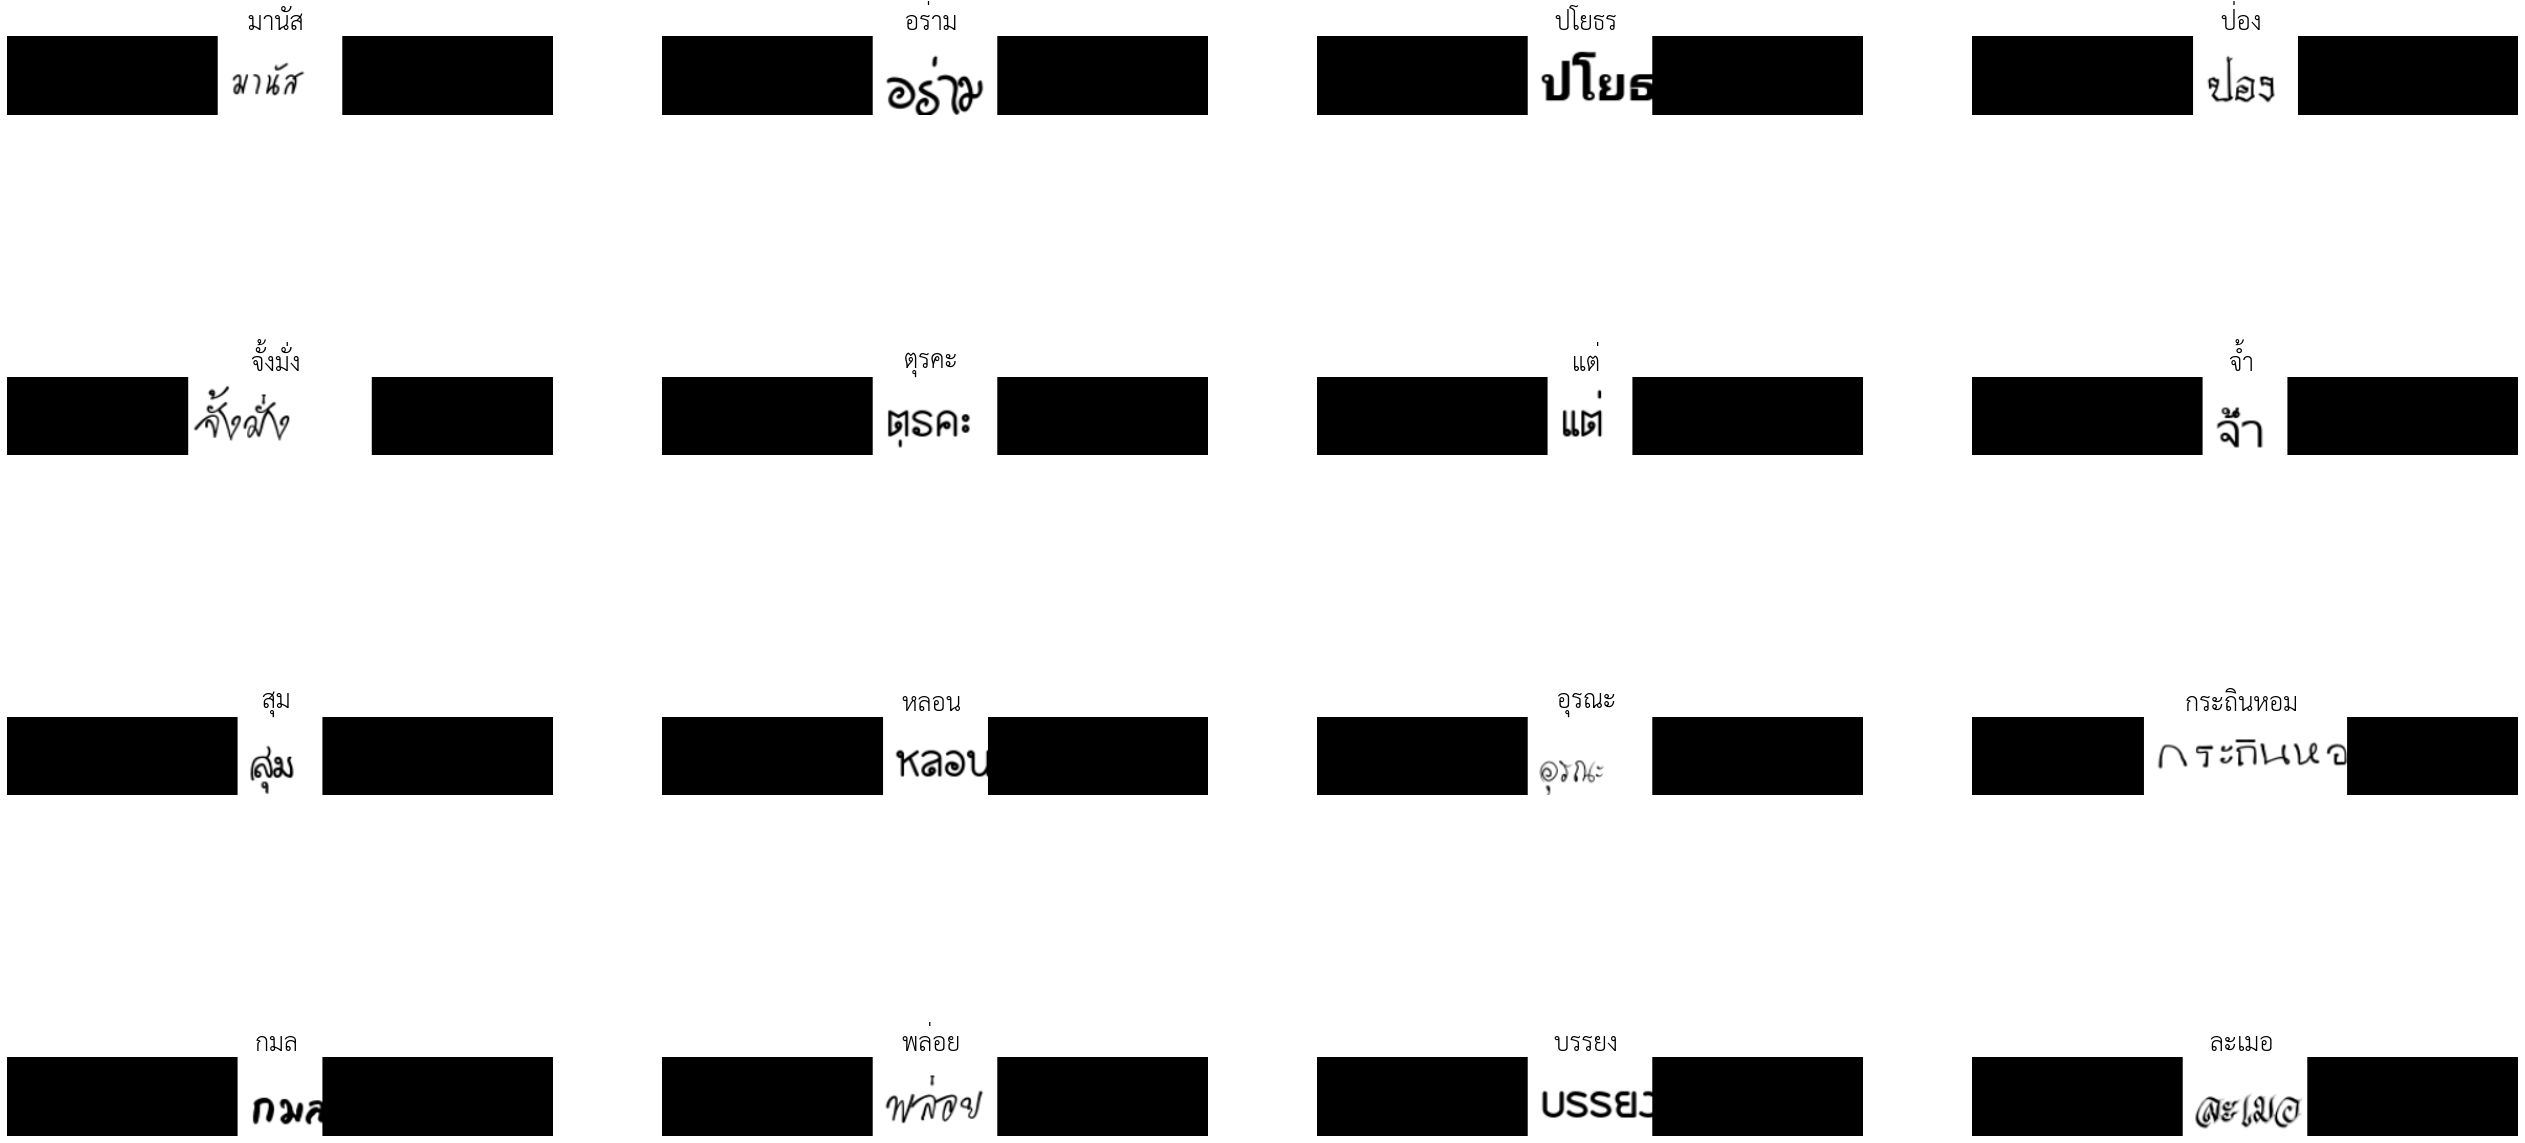

In [40]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]
    
    _, ax = plt.subplots(4, 4, figsize=(45, 24))
    s = 0
    for i in range(s,s+16,1):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[(i-s) // 4, (i-s) % 4].imshow(img, cmap="gray")
        ax[(i-s) // 4, (i-s) % 4].set_title(label)
        ax[(i-s) // 4, (i-s) % 4].axis("off")


plt.show()

In [41]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None,**kwargs):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost
    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 3), name="image")
    # theta = Localization()(input_img)
    # x = BilinearInterpolation(height=image_width, width=image_height)([input_img, theta])
    labels = keras.layers.Input(name="label", shape=(None,))
   
    x = tf.keras.applications.InceptionV3(include_top=False,
          weights="imagenet",
          input_tensor=None,
          input_shape=(image_width, image_height,3))(input_img)
    


    new_shape = (448,64)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    # x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    # x = keras.layers.Dropout(0.2)(x)
   
    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25),name="Bi-LSTM1"
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25),name="Bi-LSTM2"
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)


    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model



# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 521, 75, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 inception_v3 (Functional)      (None, 14, 1, 2048)  21802784    ['image[0][0]']                  
                                                                                                  
 flatten (Flatten)              (None, 28672)        0           ['inception_v3[0][0]']           
                                                                                                  
 reshape (Reshape)              (None, 448, 64)      0           ['flatten[0]

In [42]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [43]:
def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    predictions_decoded_np=  predictions_decoded.numpy()
    np_slice =   predictions_decoded_np
    for i in range(len(np_slice)):      
      for j in range(len(np_slice[i])):
        if np_slice[i][j] == -1:
          np_slice[i][j] = 99
    predictions_decoded_np = np_slice
    predictions_decoded=tf.convert_to_tensor( predictions_decoded_np, dtype=tf.float32)
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )

    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())
            
        print(
            f" Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )
        

In [44]:
model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

In [45]:
epochs = 50  # To get good results this should be at least 50.
# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/200
315/315 [==============================] - 151s 432ms/step - loss: 52.6558 - val_loss: 25.2060
Epoch 2/200
315/315 [==============================] - 119s 376ms/step - loss: 22.4612 - val_loss: 22.3323
Epoch 3/200
315/315 [==============================] - 118s 374ms/step - loss: 21.5790 - val_loss: 21.8886
Epoch 4/200
315/315 [==============================] - 118s 374ms/step - loss: 20.3605 - val_loss: 20.8996
Epoch 5/200
315/315 [==============================] - 118s 374ms/step - loss: 17.5027 - val_loss: 21.3290
Epoch 6/200
315/315 [==============================] - 118s 374ms/step - loss: 13.8299 - val_loss: 17.7269
Epoch 7/200
315/315 [==============================] - 118s 374ms/step - loss: 10.2291 - val_loss: 13.1174
Epoch 8/200
315/315 [==============================] - 118s 374ms/step - loss: 7.0000 - val_loss: 11.3041
Epoch 9/200
315/315 [==============================] - 118s 374ms/step - loss: 5.0419 - val_loss: 9.8775
Epoch 10/200
315/315 [==================

KeyboardInterrupt: ignored

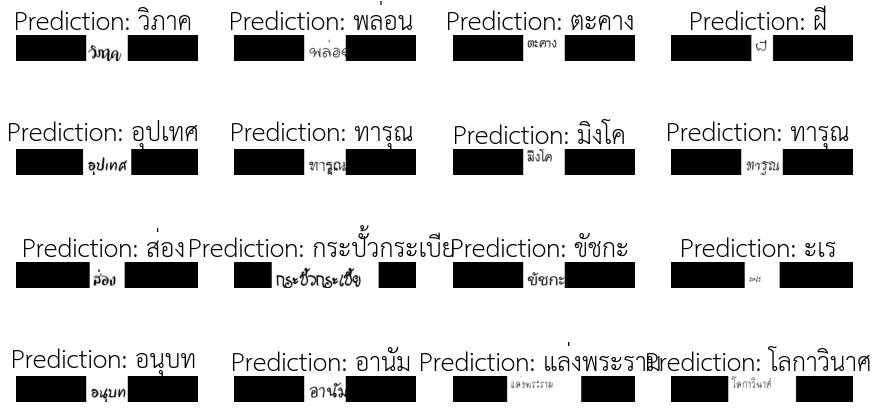

In [46]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()

NameError: ignored

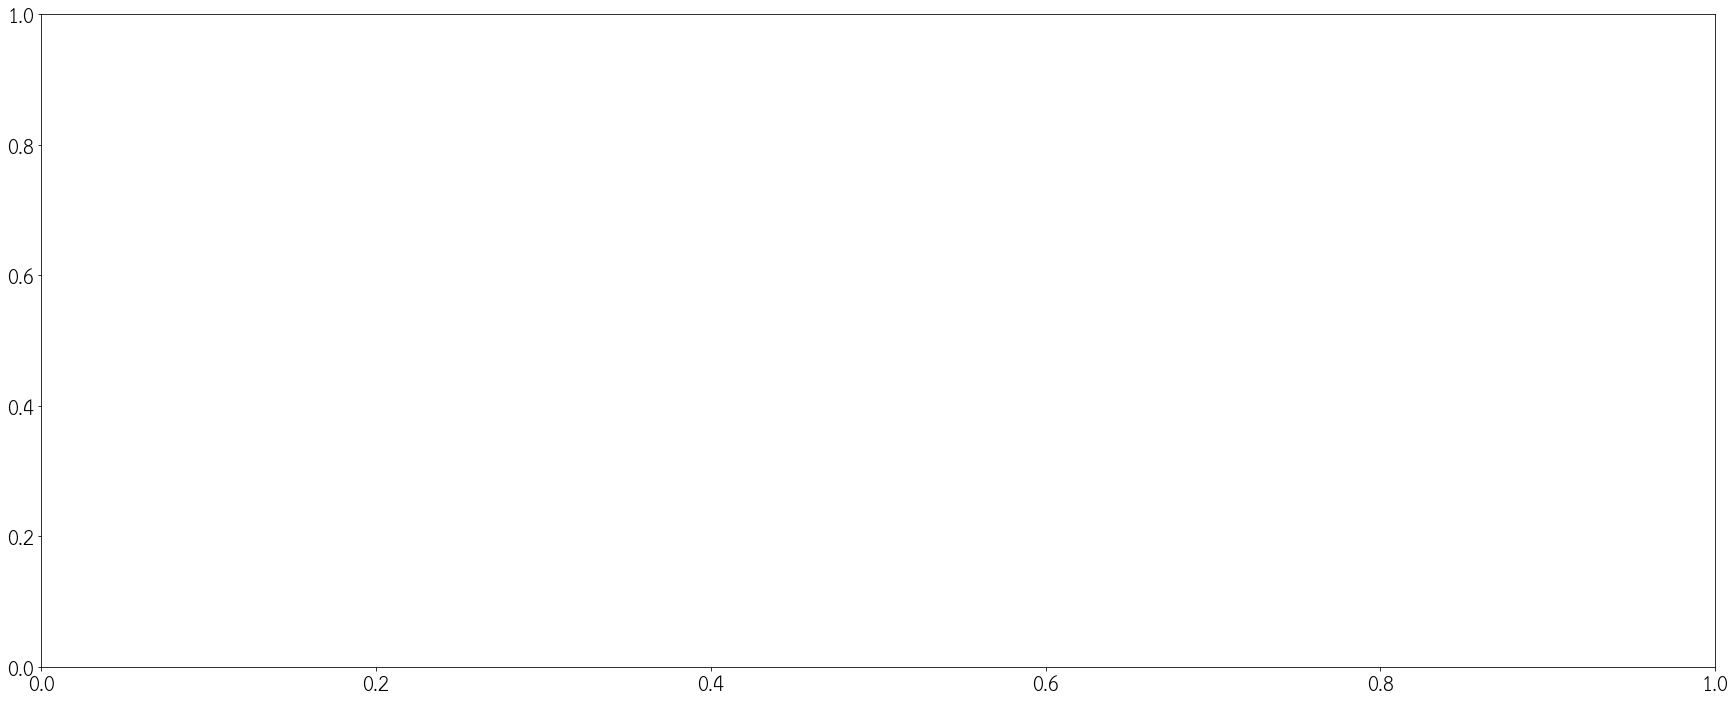

In [48]:
fig, (ax1) = plt.subplots ( figsize=(30, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(2, 50, 1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [49]:
model.save('/content/drive/MyDrive/Colab Notebooks/Project Kmitl/InceptionV3 on Total')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Project Kmitl/InceptionV3 on Total/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Project Kmitl/InceptionV3 on Total/assets


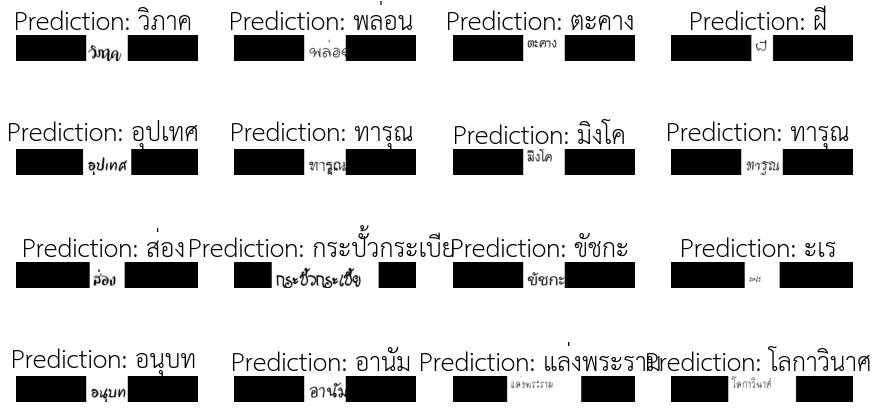

In [50]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()